In [4]:
from torchvision import datasets, transforms

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

print(len(train_data), len(test_data))


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:04<00:00, 2.03MB/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 58.9kB/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 861kB/s] 


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

60000 10000


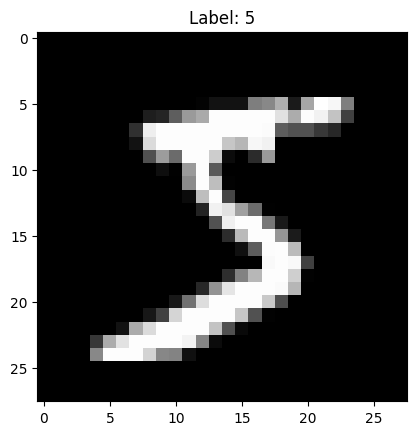

In [6]:
import matplotlib.pyplot as plt
image, label = train_data[0]

plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.show()

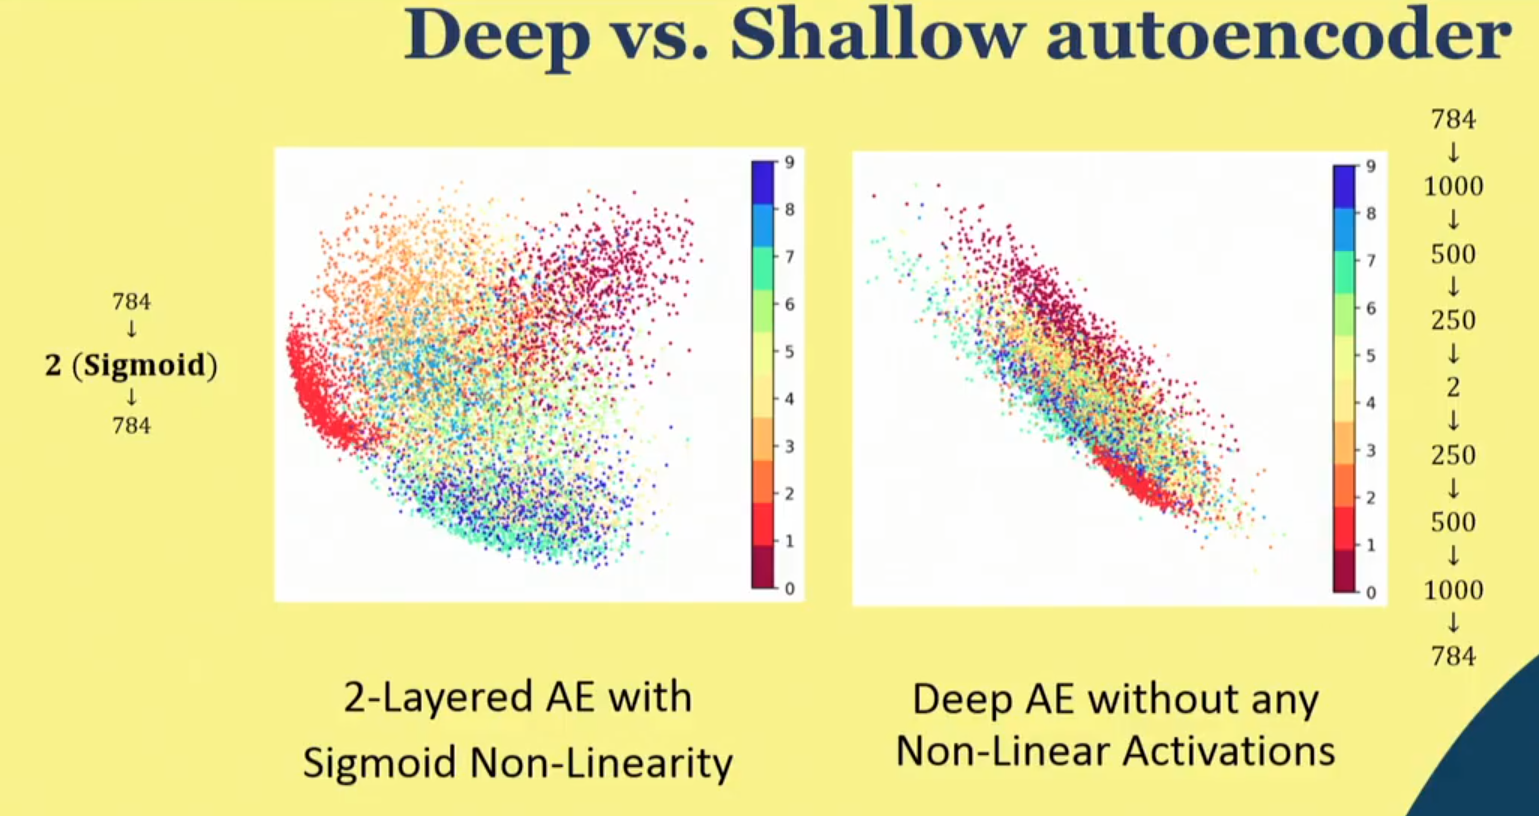
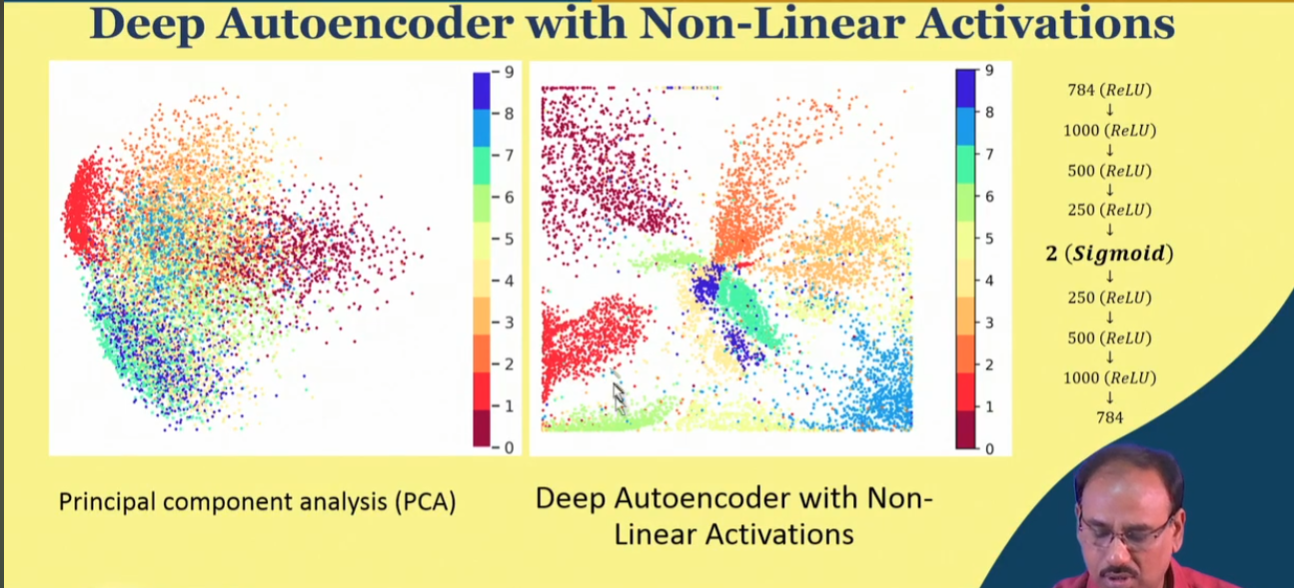
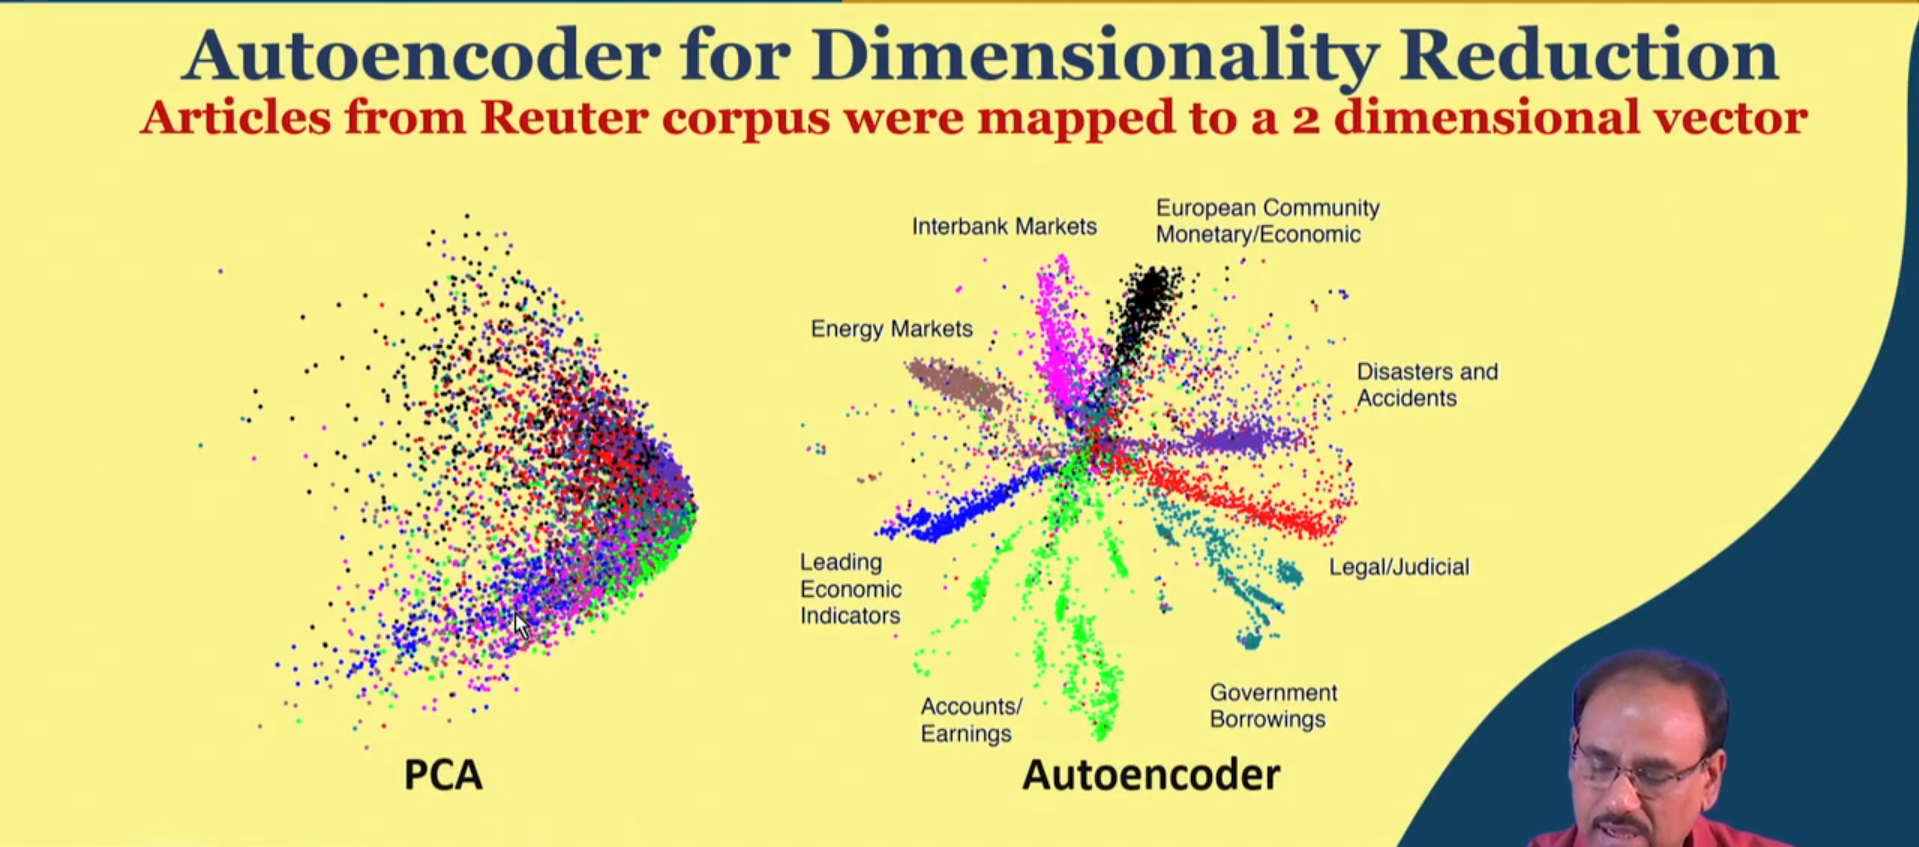
<!-- 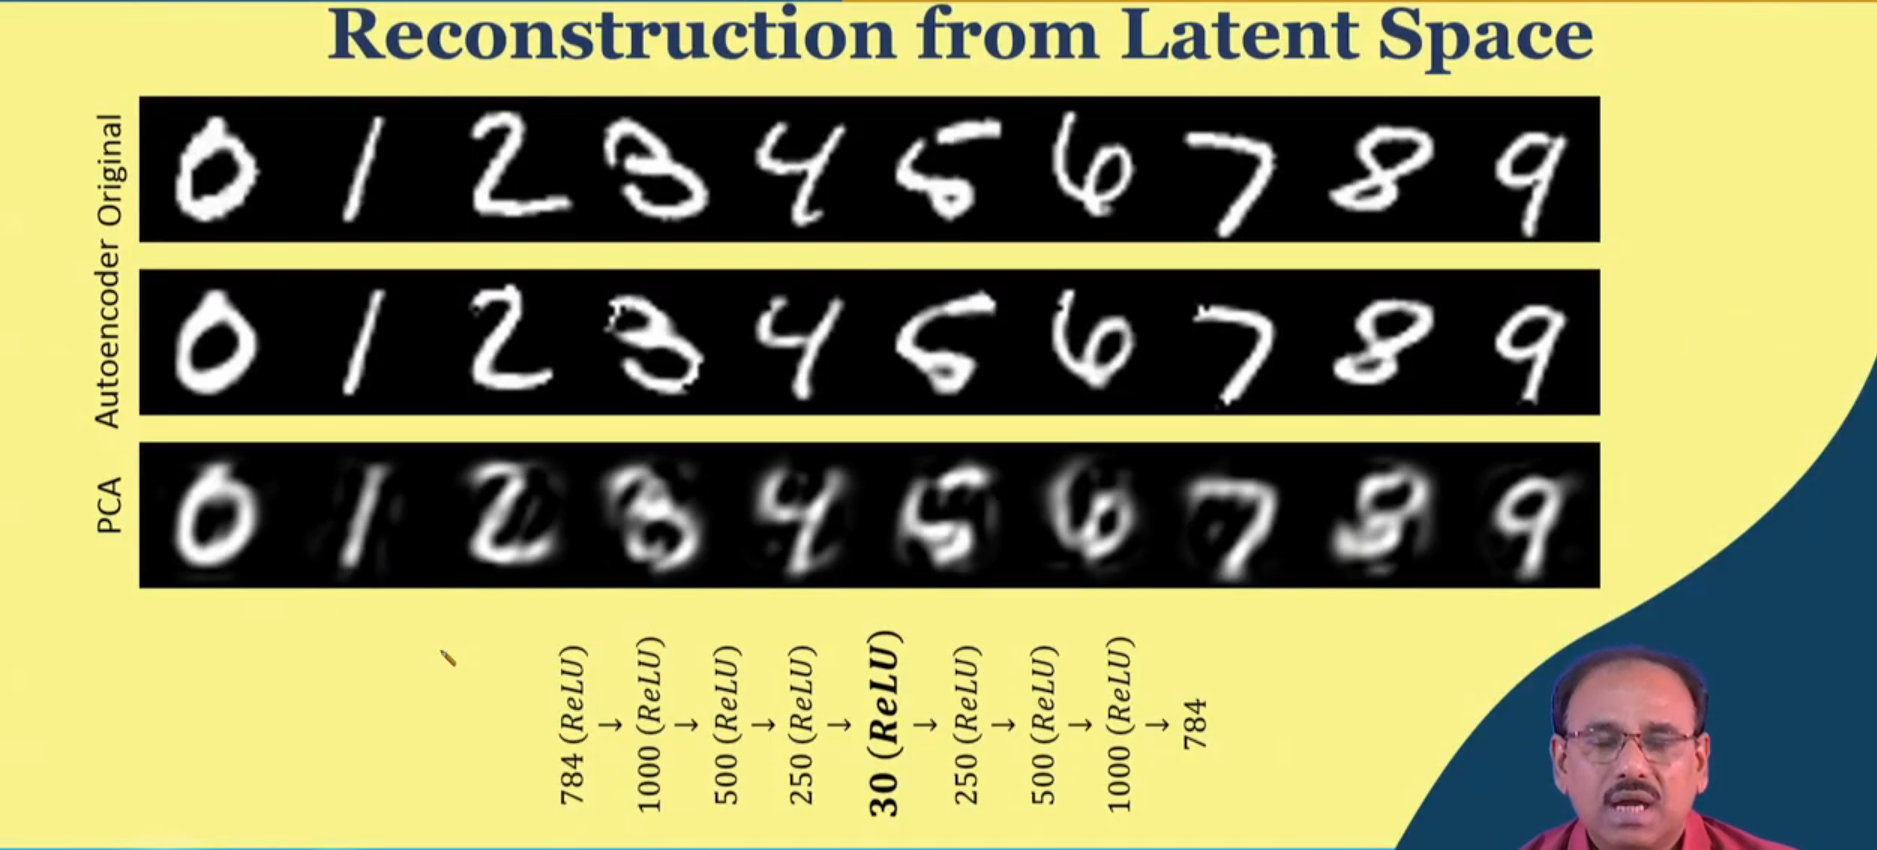 -->
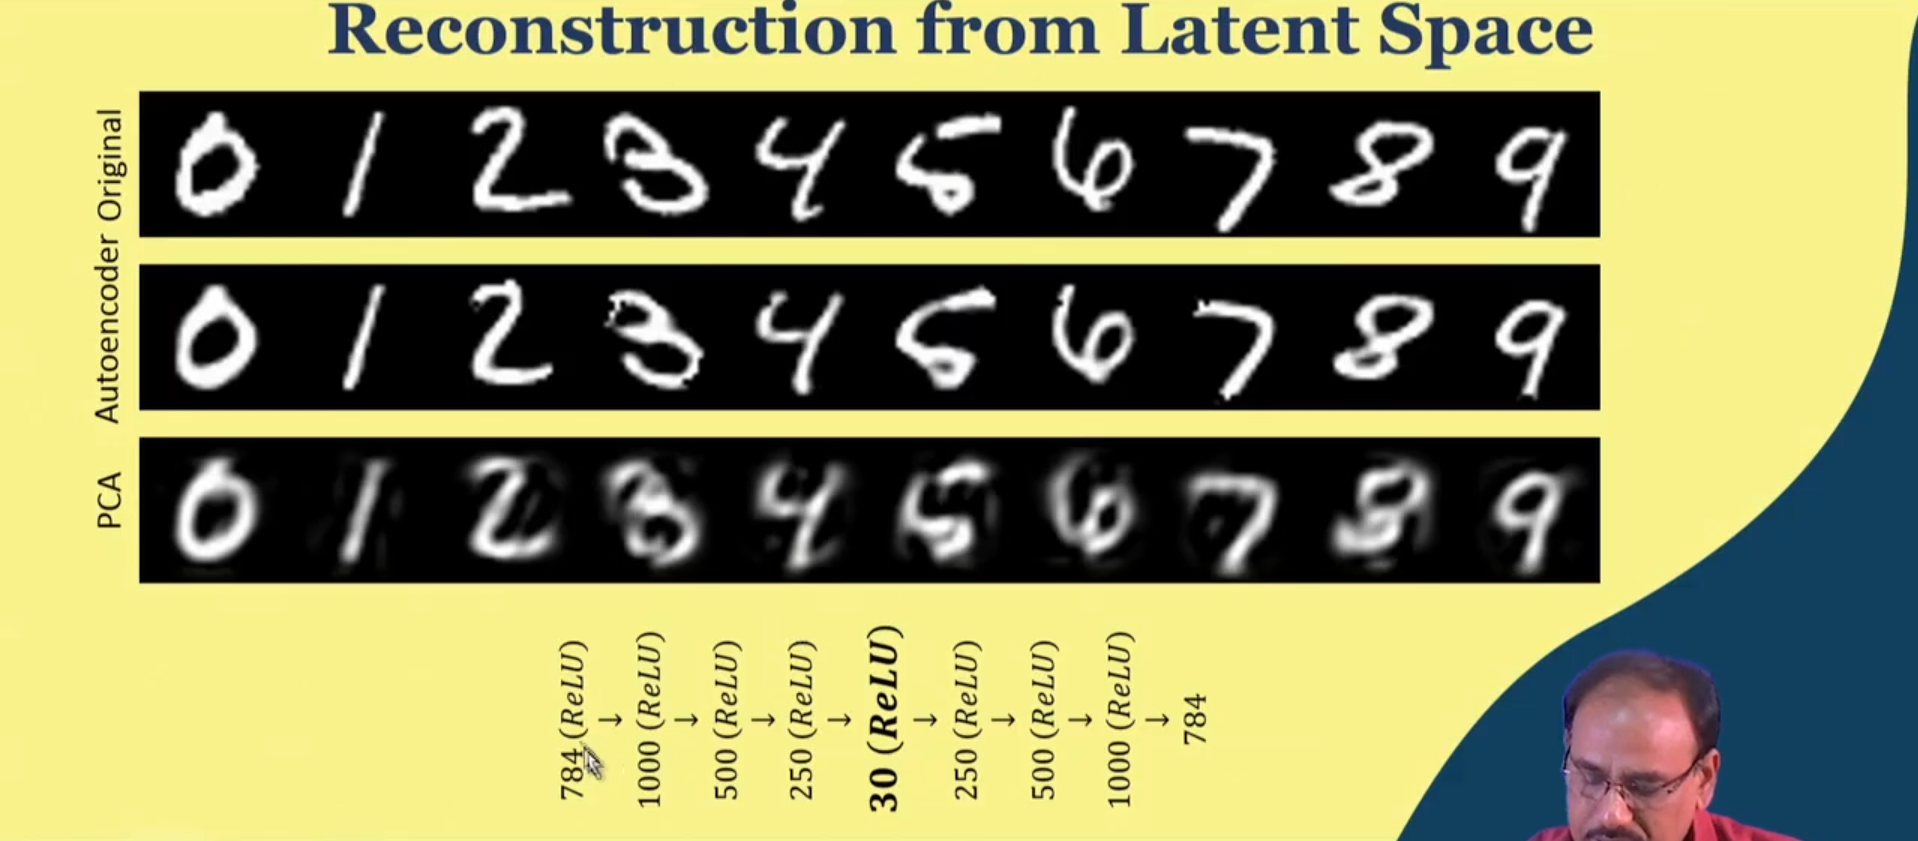

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [8]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)    # bottleneck
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()         # output in [0,1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoEncoder().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [11]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=128, shuffle=False)



epochs = 10

for epoch in range(epochs):
    running_loss = 0.0

    for images, _ in train_loader:   # labels ignored
        images = images.view(images.size(0), -1).to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.6f}")


Epoch [1/10], Loss: 0.014742
Epoch [2/10], Loss: 0.013809
Epoch [3/10], Loss: 0.013420
Epoch [4/10], Loss: 0.013131
Epoch [5/10], Loss: 0.012879
Epoch [6/10], Loss: 0.012644
Epoch [7/10], Loss: 0.012414
Epoch [8/10], Loss: 0.012189
Epoch [9/10], Loss: 0.011968
Epoch [10/10], Loss: 0.011745


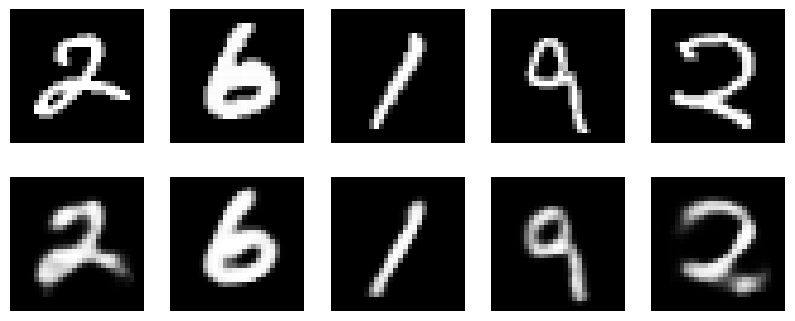

In [12]:
import matplotlib.pyplot as plt

dataiter = iter(train_loader)
images, _ = next(dataiter)
images = images.view(images.size(0), -1).to(device)

with torch.no_grad():
    reconstructed = model(images)

# Plot original vs reconstructed
n = 5
plt.figure(figsize=(10,4))

for i in range(n):
    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(images[i].cpu().view(28,28), cmap="gray")
    plt.axis("off")

    # Reconstructed
    plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed[i].cpu().view(28,28), cmap="gray")
    plt.axis("off")

plt.show()


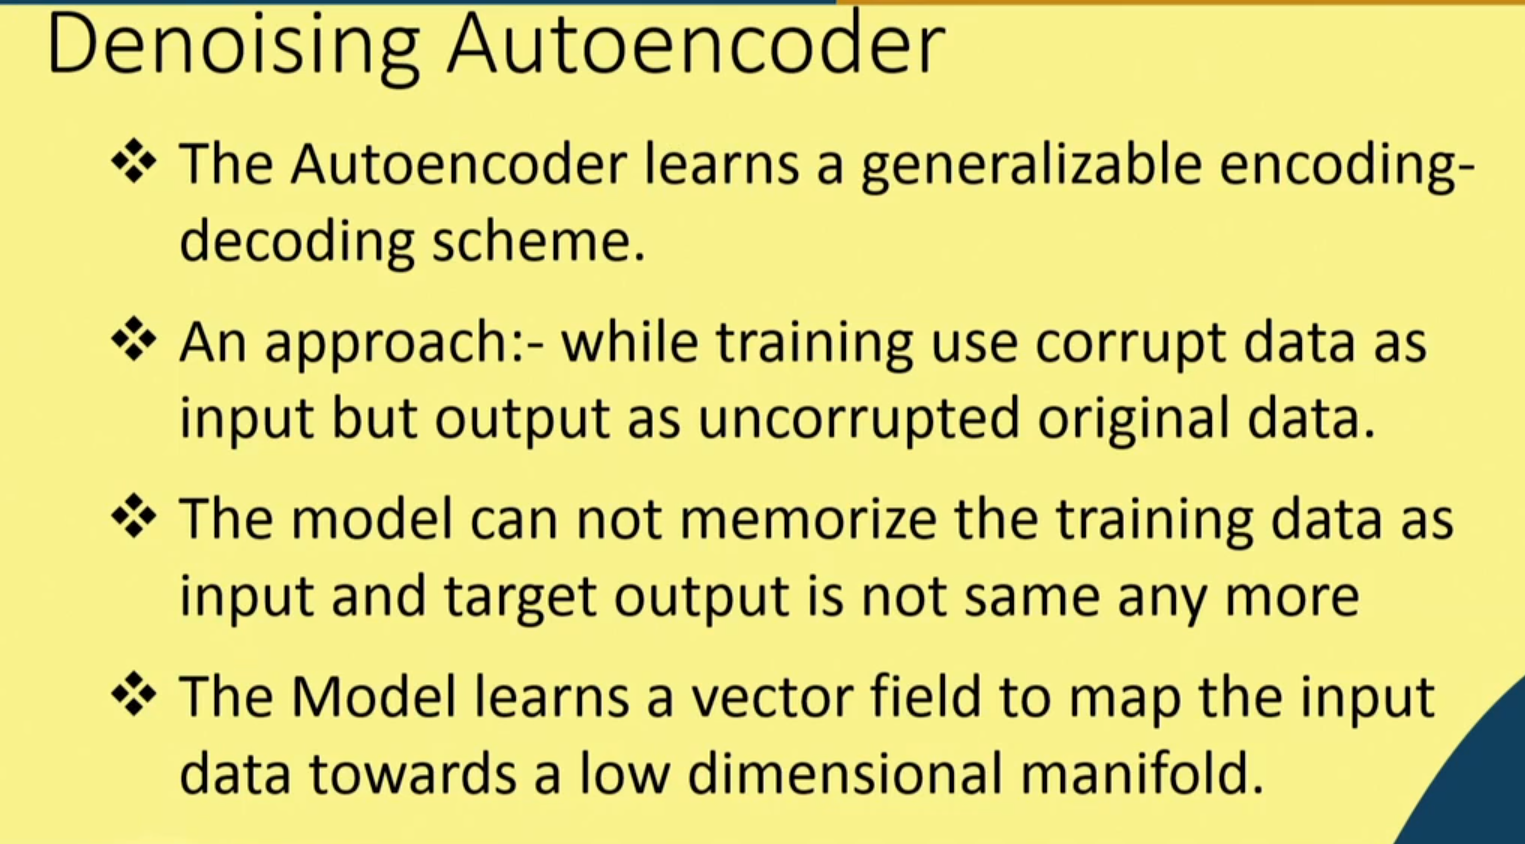